<a href="https://colab.research.google.com/github/the-sara/sign_language_classification_model/blob/main/VGG_sign_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#VGGNet : stands for visual geometry group ,its main purpose is to show how the depth of the convolution network can affect the performance

In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
#unziping the data:
from zipfile import ZipFile
with ZipFile("sign_lan.zip","r") as zip:
  zip.extractall("dataset")

In [4]:
#spliting the dataset:
train_dataset=tf.keras.utils.image_dataset_from_directory("dataset/asl_dataset",
                                                  validation_split=0.2,
                                                  subset="training",
                                                  seed=0,
                                                  image_size=(224,224),
                                                  batch_size=32)
val_dataset=tf.keras.utils.image_dataset_from_directory("dataset/asl_dataset",
                                                  validation_split=0.2,
                                                  subset="validation",
                                                  seed=0,
                                                  image_size=(224,224),
                                                  batch_size=32)


Found 2515 files belonging to 36 classes.
Using 2012 files for training.
Found 2515 files belonging to 36 classes.
Using 503 files for validation.


In [6]:
num_classes = len(train_dataset.class_names)
num_classes

36

In [7]:
#model layers :
input_layer=tf.keras.layers.Input((224,224,3))

norm=tf.keras.layers.Rescaling(1./255)

conv1=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu")
conv2=tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu")

pool1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))

conv3=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu")
conv4=tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu")

pool2=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))

conv5=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu")
conv6=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu")
conv7=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu")

pool3=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))

conv8=tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu")
conv9=tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu")
conv10=tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation="relu")

pool4=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))

flat=tf.keras.layers.Flatten()

dense1=tf.keras.layers.Dense(units=512,activation="relu")
drop1=tf.keras.layers.Dropout(rate=0.5)
dense2=tf.keras.layers.Dense(units=512,activation="relu")
drop2=tf.keras.layers.Dropout(rate=0.5)

#output :
dense3=tf.keras.layers.Dense(units=num_classes,activation="softmax")


In [8]:
#model building :
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(input_layer)
model.add(norm)
model.add(conv1)
model.add(conv2)
model.add(pool1)
model.add(conv3)
model.add(conv4)
model.add(pool2)
model.add(conv5)
model.add(conv6)
model.add(conv7)
model.add(pool3)
model.add(conv8)
model.add(conv9)
model.add(conv10)
model.add(pool4)
model.add(flat)
model.add(dense1)
model.add(drop1)
model.add(dense2)
model.add(drop2)
model.add(dense3)

In [9]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [10]:
history=model.fit(train_dataset,epochs=10,validation_data=val_dataset)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2599s 41s/step - accuracy: 0.0335 - loss: 3.5826 - val_accuracy: 0.0278 - val_loss: 3.5742
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2556s 40s/step - accuracy: 0.0558 - loss: 3.5529 - val_accuracy: 0.2664 - val_loss: 3.2776
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2577s 41s/step - accuracy: 0.1326 - loss: 3.1677 - val_accuracy: 0.6143 - val_loss: 2.0562
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2573s 40s/step - accuracy: 0.2947 - loss: 2.4420 - val_accuracy: 0.7634 - val_loss: 1.2353
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2541s 40s/step - accuracy: 0.4423 - loss: 1.8659 - val_accuracy: 0.7833 - val_loss: 0.9117
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2584s 41s/step - accuracy: 0.5440 - loss: 1.5694 - val_accuracy: 0.7932 - val_loss: 0.6894
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2544s 40s/step - accuracy: 0.5898 - loss: 1.3747 - val_accuracy: 0.8250 - val_loss: 0.5837
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2577s 41s/step - accuracy: 0.6495 - loss: 1.1797 - val_accu

<Axes: >

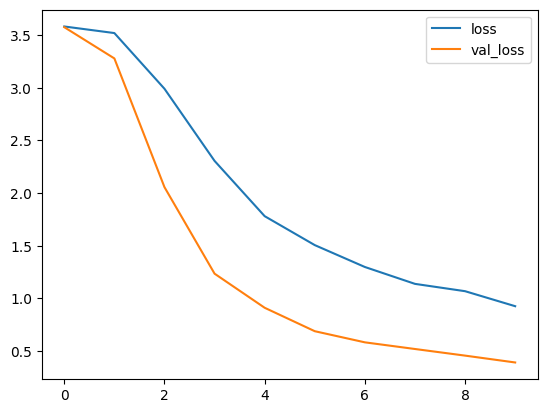

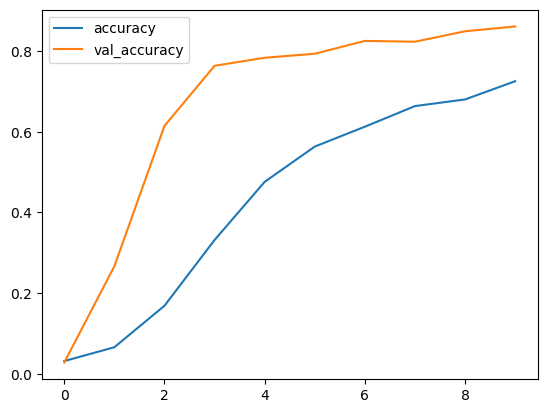

In [11]:
#model evaluation :
history_df=pd.DataFrame(history.history)
history_df.loc[:,["loss","val_loss"]].plot()
history_df.loc[:,["accuracy","val_accuracy"]].plot()